# Classifcation Metrics & K-Fold Cross Validation

# Steps:

### Step 1. Import dependencies:

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Load your dataset:
Replace the following path with the path of data set in your Google Drive.

In [46]:
# Define the path to your data
path = "/content/moblie-1.csv"

In [47]:
data = pd.read_csv(path)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Check if `null` value exists:

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Step 3. Split the data into features (X) and target variable (y):

In [49]:
# define the features (X) by dropping the 'price_range' column from the table
X = data.drop('price_range', axis=1)
# define the output (y) as 'price_range' column in the table
y = data['price_range']

### Step 4. Split the data into training and testing sets:

In [50]:
# Choose the train test ratio of 80% to 20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5. Initialize a list to store cross-validation scores:


In [51]:
cv_scores = []

### Step 6. Try different values of k for KNN:
**Note:** The function `range(1,21)' returns integers: 1,2,3,...,20

In [52]:
k_values = range(1, 21)

### Step 7. Perform cross-validation to find the optimal value of k:
We are running a for loop for different values of `k` we defined above:
for each k, we define the KNN classifier, train and test it using k-fold cross validation and store the scores (which is recall in this case) in a list called `cv_scores`.

In [53]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')
    cv_scores.append(scores.mean()) # the score for each k is optained based on the average over the scores obtained from 5 folds

In [54]:
# Print the score list
print(cv_scores)

[0.963561320754717, 0.939693396226415, 0.9622877358490566, 0.9509905660377358, 0.9673191823899371, 0.9560220125786163, 0.966069182389937, 0.9585220125786164, 0.9698427672955974, 0.9623034591194969, 0.9710927672955976, 0.9610455974842769, 0.966069182389937, 0.9597877358490565, 0.9660770440251572, 0.9610455974842769, 0.9660770440251574, 0.961053459119497, 0.962311320754717, 0.9572877358490566]


### Step 8. Find the optimal value of k:
The optimal value of k is obtained as the one corresponding to higher cv_scores.

In [55]:
optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal value of k:", optimal_k)

Optimal value of k: 11


### REPEAT

In [56]:
score_list = []

In [57]:
# repeat the last 2 steps by considering 'f1_score' metric instead of recall.
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')
    score_list.append(scores.mean())
    # the score for each k is optained based on the average over the scores obtained from 5 folds


In [58]:
# Print the score list
print(score_list)

[0.9641786473620089, 0.9644984683188269, 0.9720865862851161, 0.9717007155202924, 0.9740654073199799, 0.9724922486691623, 0.9734125950729163, 0.9719192747879506, 0.9741880740115125, 0.9726511480669803, 0.9741641839002158, 0.9738429321518108, 0.9727965698175367, 0.97322028883288, 0.9715694776643329, 0.9714097171032791, 0.9715839655773811, 0.9720257902796208, 0.9695870480036188, 0.9700559347190625]


In [59]:
# Find the optimal value of k in this case:
optimal_k_ = k_values[np.argmax(score_list)]
print("Optimal value of k:", optimal_k_)

Optimal value of k: 9


### Step 9. Train the KNN model with the optimal k value:
Feel free to use either of the two optimal k you obtained in this section.

In [60]:
best_knn = KNeighborsClassifier(n_neighbors=9)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

## Step 10. Evaluate Bias
### Step 10.1 Make predictions on the test set:

In [61]:
# Use the model you trained to make a prediction for 'X_train' data:
y_pred = best_knn.predict(X_train)

### Step 10.2. Calculate accuracy, recall, and precision

In [62]:
accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred) # fill the missing values
precision = precision_score(y_train, y_pred) # fill the missing values
f1 = f1_score(y_train, y_pred) # fill the missing values

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1_score:", f1)


Accuracy: 0.98375
Recall: 0.9811557788944724
Precision: 0.9861111111111112
f1_score: 0.9836272040302267


### Step 10.3. Calculate and plot the confusion matrix

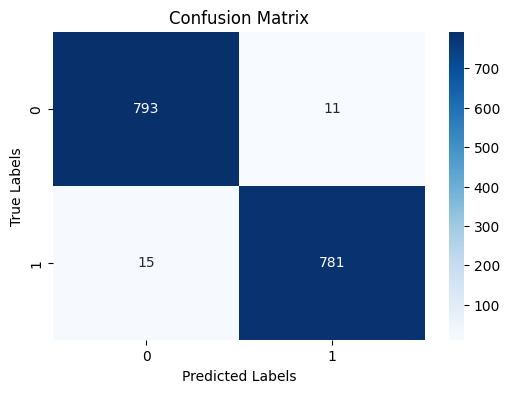

In [63]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Step 11. Evaluate Variance
### Step 11.1 Make predictions on the test set

In [64]:
# Use the model you trained to make a prediction for 'X_test' data:
y_pred = best_knn.predict(X_test)

### Step 11.2. Evaluate the model's performance

In [65]:
# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)  # y_pred is the predicted labels
recall = recall_score(y_test, y_pred)  # y_test is the true labels
precision = precision_score(y_test, y_pred)  # y_test is the true labels
f1 = f1_score(y_test, y_pred)  # y_test is the true labels

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1_score:", f1)

Accuracy: 0.98
Recall: 0.9705882352941176
Precision: 0.99
f1_score: 0.9801980198019802


### Step 11.3. Calculate the confusion matrix


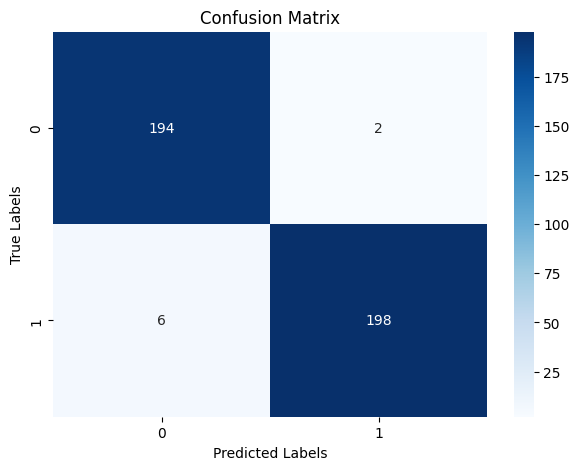

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()